# PART 02. 데이터 전처리

## 1장. 제어문

### 1절. 조건문 ( if / else , ifelse() )

#### [Problem]  if, else
- 정수를 입력받아 해당 숫자가 짝수인지 홀수인지 판단하고, 만약 입력받은 숫자가 정수가 아닐 경우 “정수를 입력해주세요.”라는 문구를 출력하는 if문을 작성하라

In [ ]:
n = input('짝/홀수를 판별합니다. 정수를 입력하세요. >')

try:
    if int(n)%2 == 0:
        print(n,': 짝수입니다.')
    else:
        print(n,': 홀수입니다.')
        
except:
      print('입력한 데이터는 정수가 아닙니다.')

# def is_int(str):
#    try:
#        n = int(str)
#        return True
#    except ValueError:
#        return False

#### [Problem]  ifelse
- 정수를 입력받아 짝수이면 “짝수입니다.”, 홀수이면 “홀수입니다.”를 출력하고, 정수가 아닐 경우 “정수가 아닙니다.”를 출력하는 ifelse문을 작성하라

### 2절. 반복문 ( for, while, repeat )

#### [Problem]  for
- 반복문을 사용하지 않은 경우 : print 함수를 4번 실행
- 반복문을 사용한 경우 : for문을 1번 실행

In [ ]:
print("The year is", 2015)
print("The year is", 2016)
print("The year is", 2017)
print("The year is", 2018)

In [ ]:
# 방법 1

year = list(range(2015,2019))    # 2015년~2018년 까지의 연도 리스트 생성

for x in year:
    print('"The year is', x, '"')

In [ ]:
# 방법 2
# {}.format() : format 함수 괄호 안의 숫자를 문자열로 변환하여 순차적으로 {}에 넣는다. 

year = list(range(2015,2019))    # 2015년~2018년 까지의 연도 리스트 생성

i = 0
        
for x in year:
    print('"The year is {}"'.format(x))
    i += 1      # += 숫자 덧셈 후 대입 (또는 문자열 연결 후 대입)

#### [Problem]  while

- for문을 사용하여 해결했던 예제에 대해 while문을 이용해서 똑같은 결과값을 출력하는 코드를 작성하라

In [ ]:
i = 2015

while i < 2019:
    print('"The year is {}"'.format(i))
    i += 1

#### [Problem]  break
- break 를 사용하여 1~10 까지의 숫자 중 짝수만 출력하라

In [ ]:
for i in (list(range(1,11))):
    if i%2 == 0:
        print(i)
    if i >= 11:
        break    # i가 10이상이면 반복문 종료

In [ ]:
i = 0

while True:
    print(i)
    i += 2
    if i >= 11:
        break    # i가 10이상이면 반복문 종료

#### [Problem]  continue
- continue 를 사용하여 1~10 까지의 숫자 중 홀수만 출력하라

In [ ]:
# 반복문 내의 next를 만나면 print(i)를 실행하지 않고 for문의 맨 처음으로 이동

for i in (list(range(1,11))):
    if i%2 == 0:
        continue
    print(i)

In [ ]:
i = 0
while i < 11:        # i가 100보다 작을 때 반복. 0부터 99까지 증가하면서 100번 반복
    i += 1            # i를 1씩 증가시킴
    if i % 2 == 0:    # i를 2로 나누었을 때 나머지가 0이면 짝수
        continue      # 아래 코드를 실행하지 않고 건너뜀
    print(i)

## 2장. 데이터 변환

### 1절. 파생변수 생성

#### [Problem]  data.frame에서의 변수추가
- R의 내장 데이터 iris에 행번호를 담고 있는 ‘ID’ 라는 변수를 새로 생성하라

In [ ]:
# iris 데이터의 구조 확인 : 150개의 행과 5개의 변수를 가지고 있다.
str(iris)

# 150개 개체들의 고유번호에 해당하는 'ID' 변수를 새로 생성
iris$ID<-1:150

# iris 데이터의 상위 6개의 행을 출력한 결과, ID 변수가 추가된 것을 확인할 수 있다.
head(iris)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris_data = iris.data

In [ ]:
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['lable'] = iris.target
df_iris

In [ ]:
df_iris['ID'] = list(range(1,151))
df_iris

#### [Problem]  [ ] : 대괄호를 활용한 변수추가
- $를 이용하여 생성했던 ID 변수의 값이 짝수이면 A, 홀수이면 B로 분류하는 새로운 변수(변수명 : Group)를 [ ]를 활용하여 생성하라.

In [ ]:
# np.where 사용

df_iris['Group'] = np.where( df_iris['ID'].values % 2 == 0, 'Even', 'Odd' )
df_iris

In [ ]:
# apply 및 lambda 함수 사용

def odd(x):
    try:
        if int(x)%2 == 0:
            return 'even'
        else:
            return 'Odd'
    except:
        print('Error')

df_iris['Group'] = df_iris['ID'].apply(lambda x : odd(x))

df_iris

#### [Problem]  새로운 변수 추가
- iris 데이터에서 Sepal.Length 변수와 Petal.Length 변수의 값을 더하여 ‘Sum.Length’ 라는 새로운 변수를 생성하라.

In [ ]:
df_iris['Sum.Length'] = df_iris['sepal length (cm)'] + df_iris['petal length (cm)']

df_iris

#### [Problem]  데이터 프레임에 접근 및 수정
- 학생의 id(s1, s2, s3, s4, s5, s6)를 담은 student_id 변수와 시험점수(55, 90, 85, 71, 63, 99)를 담은 score 변수로 구성된 데이터프레임을 생성
- 그 후 시험점수가 90점 이상이면 수, 80점 이상 90점 미만이면 우, 70점 이상 80점 미만이면 미, 60점 이상 70점 미만이면 양, 60점 이하이면 가로 분류하는 ‘grade’ 라는 변수를 새롭게 생성

In [ ]:
import numpy as np
import pandas as pd
import sklearn

# 데이터 프레임 생성 - 개별 생성
df_student = pd.DataFrame()

df_student['ID'] = ['s1', 's2', 's3', 's4', 's5', 's6']
df_student['Score'] = [55, 90, 85, 71, 63, 99]

df_student

In [ ]:
# 학생의 점수(score변수)를 수, 우, 미, 양, 가로 분류하여 'grade' 라는 새로운 변수 생성
def grade(x):
    if x >= 90:
        return '수'
    elif x >=80:
        return '우'
    elif x >=70:
        return '미'
    elif x >=60:
        return '양'
    else:
        return '가'

df_student['Grade'] = df_student['Score'].apply(lambda x : grade(x))
df_student

### 2절. 변수 축소

#### [Problem]  주성분분석
- R에 내장된 USArrests 데이터는 1973년 미국 50개주 100,000명의 인구 당 체포된 세 가지 강력범죄수(assault, murder, rape)와 각 주마다 도시에 거주하는 인구의 비율(%)로 구성되어있다.
- 주성분 분석을 수행하여 해당 데이터의 변수들을 가장 잘 요약하는 주성분을 구하고 해석하라.

In [39]:
import numpy as np
import pandas as pd

# 데이터 표준화를 위한 패키지
# 파이썬으로 주성분 분석을 수행할 때는 데이터 표준화가 선행 되어야 한다.
from sklearn.preprocessing import StandardScaler

# 차원축소를 위한 패키지
from sklearn.decomposition import PCA

# 그래프를 그리기 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt

In [40]:
# arrests 데이터 불러오기 및 데이터 프레임 생성

df_arrests = pd.read_csv( "C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/USArrests.csv",
                         index_col='Unnamed: 0' )

# 데이터 프레임 파악
display(df_arrests.columns)
print()
display(df_arrests.head())
print()
display(df_arrests.describe())
print()
display(df_arrests.info())

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000



<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


None

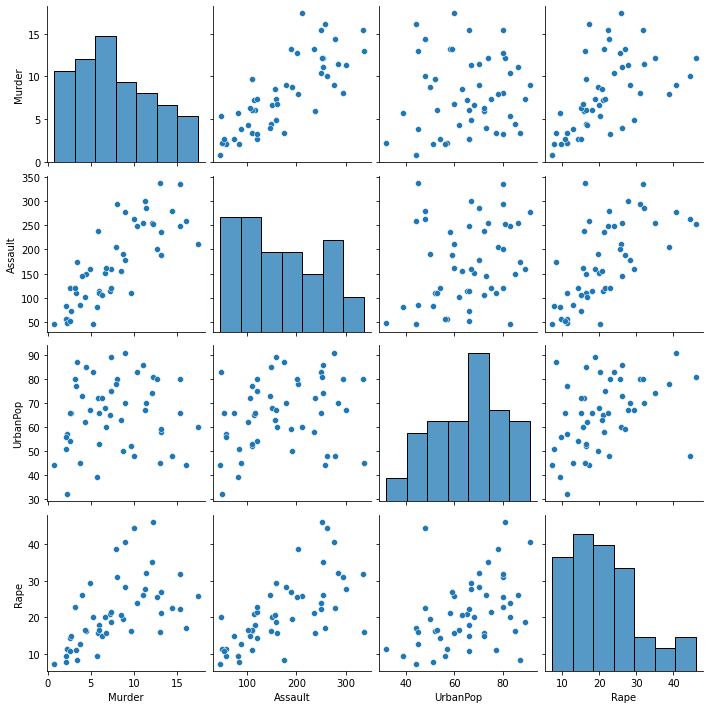

In [41]:
#산점도를 통해 변수간 상관관계 파악
# pairplot() : 둘 이상의 변수에 대해 모든 가능한 산점도를 그려줌

sb.pairplot(df_arrests, diag_kind='hist')
plt.show()

In [42]:
# 데이터 표준화 수행
# 파이썬으로 주성분 분석을 수행할 때는 데이터 표준화가 선행 되어야 한다.

x = df_arrests
scaler = StandardScaler()

x_scaled = StandardScaler().fit_transform(x)
x = pd.DataFrame(data=x_scaled, index=x.index, columns=x.columns)

# 표준화 수행 전/후 비교
display(df_arrests.head())
print()
x.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [48]:
# ② 주성분분석 수행
pca = PCA(n_components=4) # 주성분의 갯수
pca.fit(x)

# Proportion of Variance
pca.explained_variance_ratio_

pca_result = pd.Series(pca.explained_variance_ratio_,
                      index = df_arrests.columns)

pca_result

# 실행 결과 주성분 2개만 사용해도 86.7%의 설명력을 가진다

Murder      0.620060
Assault     0.247441
UrbanPop    0.089141
Rape        0.043358
dtype: float64

Text(0, 0.5, 'Variances')

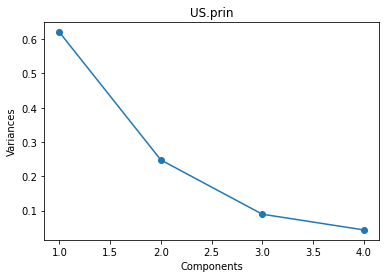

In [49]:
# screeplot 그리기
# 주성분분석의 결과를 plot함수 인자값으로 지정하면 scree plot이 생성된다.


pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values,
         pca.explained_variance_ratio_,
         'o-')

plt.title('US.prin')
plt.xlabel('Components')
plt.ylabel('Variances')

In [ ]:
# ③ Loading
# 주성분 계수

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4'], index=df_arrests.columns)
loadings

In [ ]:
# ④ Scores

pc_score = pca.transform(x)
pc_score = pd.DataFrame(data=pc_score, columns = ['PC1', 'PC2','PC3','PC4'])# 주성분으로 이루어진 데이터 프레임 구성

pc_score.head()
pc_score.corr()

In [ ]:
# ⑤ 제 1-2 주성분에 의한 행렬도 (biplot)


In [1]:
import numpy as np
import pandas as pd

# min-max 정규화 패키지 (StandardScaler 아님!!!!)
from sklearn.preprocessing import MinMaxScaler

# 요인분석을 위한 패키지
from factor_analyzer import FactorAnalyzer

# 그래프를 그리기 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# swiss 데이터 불러오기 및 데이터 프레임 생성 

df_swiss = pd.read_csv( "C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/swiss.csv",
                      index_col='Location' )

# 데이터 프레임 파악
display(df_swiss.columns)
print()
display(df_swiss.head())
print()
display(df_swiss.describe())
print()
display(df_swiss.info())

Index(['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality'],
      dtype='object')

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Location,,,,,,
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000



<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


None

In [3]:
# min-max 정규화 수행

x = df_swiss
scaler = MinMaxScaler()

x_scaled = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(data=x_scaled, index=x.index, columns=x.columns)

# 정규화 수행 전/후 비교
display(df_swiss.head())
print()
x.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Location,,,,,,
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Location,,,,,,
Courtelary,0.786087,0.178531,0.352941,0.211538,0.079816,0.721519
Delemont,0.836522,0.496045,0.088235,0.153846,0.845069,0.721519
Franches-Mnt,1.000000,0.435028,0.058824,0.076923,0.932550,0.594937
Moutier,0.883478,0.398870,0.264706,0.115385,0.323148,0.601266
Neuveville,0.728696,0.477966,0.411765,0.269231,0.030761,0.620253


In [50]:
# 요인분석을 수행하기 전에 요인 수 선택


fa = FactorAnalyzer(n_factors=6, rotation=None)
fa.fit(df_swiss)

## Eigen Value 확인

ev, v = fa.get_eigenvalues()
ev_result = pd.Series(ev,
                      index=df_swiss.columns)
ev_result

Fertility           3.199757
Agriculture         1.188308
Examination         0.847610
Education           0.438929
Catholic            0.204534
Infant.Mortality    0.120863
dtype: float64

Text(0, 0.5, 'Eigen Values')

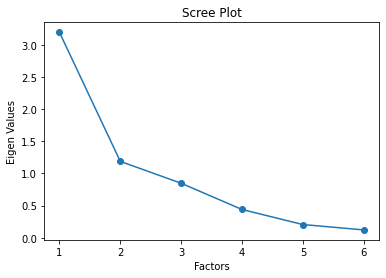

In [52]:
# screeplot 그리기

plt.scatter(range(1, df_swiss.shape[1]+1), ev)
plt.plot(range(1, df_swiss.shape[1]+1), ev)

plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Values')

In [59]:
# 탐색적 요인분석 수행
## 요인 개수는 3개
## factanal함수 rotation 인자의 값은 "varimax" 로 설정 -> 최대우도 방법
## Uniquenesses 는 어떻게????????????????????????

fa = FactorAnalyzer(n_factors=3,
                    rotation="varimax")    # 최대우도 추정법
fa.fit(df_swiss)
fa.loadings_

array([[-0.51214533,  0.20192748,  0.83212639],
       [-0.77390999,  0.31080486, -0.1266588 ],
       [ 0.75205851, -0.42214892, -0.20964145],
       [ 0.90047044,  0.07901981, -0.26264268],
       [-0.18677287,  0.91473045,  0.22050854],
       [ 0.02887888,  0.07700352,  0.49931169]])

In [60]:
# Loadings
efa_result = pd.DataFrame(fa.loadings_, index=df_swiss.columns)
efa_result

,0,1,2
Fertility,-0.512145,0.201927,0.832126
Agriculture,-0.773910,0.310805,-0.126659
Examination,0.752059,-0.422149,-0.209641
Education,0.900470,0.079020,-0.262643
Catholic,-0.186773,0.914730,0.220509
Infant.Mortality,0.028879,0.077004,0.499312


In [77]:
fa.get_factor_variance()

(array([2.27338663, 1.16448955, 1.11934368]),
 array([0.37889777, 0.19408159, 0.18655728]),
 array([0.37889777, 0.57297936, 0.75953664]))

In [82]:
# SS loadings, Proportion Var., Cumulative Var.

efa_result2 = pd.DataFrame(fa.get_factor_variance(),
                          index = ['SS Loadings', 'Proportion Var', 'Cumulative Var'])
efa_result2

,0,1,2
SS Loadings,2.273387,1.164490,1.119344
Proportion Var,0.378898,0.194082,0.186557
Cumulative Var,0.378898,0.572979,0.759537


<AxesSubplot:>

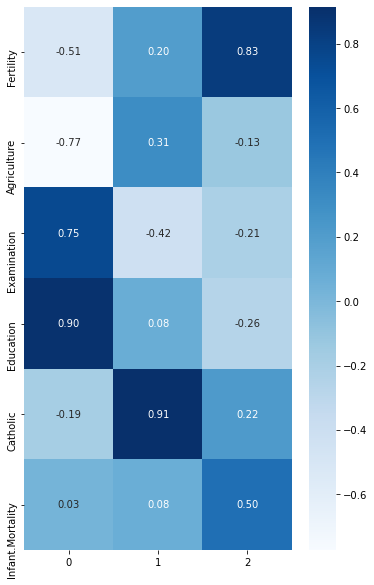

In [81]:
# 히트맵 그리기

plt.figure(figsize=(6,10))
sb.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

### 3절. 표준화와 정규화

#### [Problem]  표준화
- R의 내장 데이터 ‘mtcars’의 mpg(마일)변수와 hp(총마력)변수로만 이루어진 데이터프레임(test.cars)을 생성하고, 각 변수를 표준화한 새로운 변수를 추가하라. (mpg를 표준화한 변수의 이름은 mpg_scale, hp를 표준화한 변수의 이름은 hp_scale로 지정)

In [90]:
# mtcars 데이터 불러오기 및 데이터 프레임 생성

df_mtcars = pd.read_csv("C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/mtcars.csv",
                        index_col='model' )

# 데이터 프레임 파악
display(df_mtcars.columns)
print()
display(df_mtcars.head())
print()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [94]:
# mpg(마일)변수와 hp(총마력)변수로만 이루어진 데이터프레임(test.cars) 생성

test_cars = df_mtcars[ ['mpg', 'hp'] ]

# 데이터 프레임 파악
display(test_cars.columns)
print()
display(test_cars.head())
print()
display(test_cars.describe())
print()
display(test_cars.info())

Index(['mpg', 'hp'], dtype='object')

,mpg,hp
model,,
Mazda RX4,21.0,110
Mazda RX4 Wag,21.0,110
Datsun 710,22.8,93
Hornet 4 Drive,21.4,110
Hornet Sportabout,18.7,175


,mpg,hp
count,32.000000,32.000000
mean,20.090625,146.687500
std,6.026948,68.562868
min,10.400000,52.000000
25%,15.425000,96.500000
50%,19.200000,123.000000
75%,22.800000,180.000000
max,33.900000,335.000000



<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   hp      32 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 768.0+ bytes


None

In [ ]:
# 표준화한 변수 추가
test.cars<-transform(test.cars,
                     mpg_scale=scale(test.cars$mpg),
                     hp_scale=scale(test.cars$hp))
head(test.cars)

#### [Problem]  정규화
- R의 내장 데이터 iris의 Sepal.Length 변소를 정규화하는 코드 작성
- scale 함수를 이용하는 경우와 사용자 정의 함수를 이용하는 경우에 대해 각각 실행

In [ ]:
## 가. scale함수 이용
## scale 함수를 이용하여 R의 내장 데이터 iris의 Sepal.Length 변수를 정규화하는 코드를 살펴보자.

# iris데이터 Sepal.Length  변수의 최솟값 저장
Min<-min(iris$Sepal.Length)

# iris데이터 Sepal.Length 변수의 최댓값 저장
Max<-max(iris$Sepal.Length)

# scale함수를 활용한 min-max 표준화
iris$SL_new<-scale(iris$Sepal.Length, center=Min, scale=Max-Min)

head(iris)

In [ ]:
## 나. 사용자 정의 함수 이용

# 정규화한 값을 반환하는 함수 정의
# x : 정규화하고자 하는 숫자형 벡터
normalize <-function(x) {
  return ((x-min(x)) / (max(x) -min(x)))
}

# 숫자형 벡터 생성
num<-c(50:500)

# 생성한 사용자 정의 함수를 이용하여 정규화 수행
num_new<-normalize(num) 
head(num_new)

## 3장. 데이터 결합 및 요약

### 1절. 데이터 결합

#### [Problem]  rbind
- id와 last_name이라는 변수로 이루어진 두 개의 데이터프레임을 생성한 후, 두 데이터프레임을 행 기준으로 결합하여 고객의 아이디와 성을 저장하고 있는 하나의 데이터프레임으로 생성하라.

In [ ]:
# 행으로 묶을 데이터 생성 : rbind를 사용할 때에는 열의 이름과 개수가 동일해야 함
customer1 <- data.frame(id = c("c01","c02","c03","c04"),
                        last_name = c("Lee", "Kim", "Choi", "Park"))

customer2 <- data.frame(id = c("c05", "c06", "c07"), 
                        last_name = c("Lim" , "Bae", "Kim"))

# rbind를 사용하여 두 데이터프레임을 결합
id_name <- rbind(customer1, customer2)    
id_name  

#### [Problem]  cbind
- 고객의 나이(age)와 수입(income)을 담고 있는 데이터(age_income)를 새로 생성하고, rbind 함수 예제에서 생성했던 id_name 데이터와 열을 기준으로 결합하여 customer 데이터를 생성하라.

In [ ]:
# 열로 묶을 데이터 생성 : cbind를 사용할 때에는 행의 개수가 동일해야 함
# age변수와 income변수로 구성된 데이터프레임 생성
age_income <- data.frame(age = c(20, 25, 37, 40, 32, 45, 37), 
                         income = c(2500, 6400, 0, 7000, 3400, 3800, 5010))

# cbind를 사용하여 두 데이터프레임을 결합
customer <- cbind(id_name, age_income)     
customer

#### [Problem]  merge
- 고객의 아이디(id), 이름(name)으로 이루어진 데이터프레임(id_name)과 고객의 아이디(id), 번호(number)로 이루어진 데이터프레임(id_number)을 생성한 뒤, 다양한 방법을 사용하여 두 데이터를 병합하라.

In [ ]:
# 병합에 사용할 데이터프레임 생성
id_name <- data.frame(id = c("c01","c02","c03","c04","c05", "c06", "c07"), 
                      last_name = c("Lee", "Kim", "Choi", "Park", "Lim" , "Bae", "Kim"))

id_number <- data.frame(id = c("c03", "c04", "c05", "c06", "c07", "c08", "c09"), 
                        number = c(3, 1, 0, 7, 3, 4, 1))

# id_name, id_number 데이터프레임 확인
id_name
id_number

In [ ]:
# Q1) id 칼럼을 기준으로 두 테이블이 모두 공통된 값을 가지고 있는 경우에만 두 데이터(id_name, id_number)를 병합.
# (데이터베이스의 Inner Join에 해당)

merge(id_name, id_number, by = 'id')

In [ ]:
# Q2) 공통된 값이 없는 경우에도 데이터가 출력되도록 id 칼럼을 기준으로 두 데이터(id_name, id_number)의 모든 행을 병합.
# (데이터베이스의 Outer Join에 해당)
# 기준칼럼에 공통된 값이 없는 경우, 다른 변수 값 자리에는 NA가 채워짐

merge(id_name, id_number, by = 'id', all = T) 

In [ ]:
# Q3) id 칼럼을 기준으로 두 데이터(id_name, id_number)를 병합하되 기준칼럼에 공통 값이 없는 경우에는 id_name 데이터를 기준으로 병합.
# (데이터베이스의 Left Outer Join에 해당)

merge(id_name, id_number,  by = 'id', all.x = T)

In [ ]:
# Q4) id 칼럼을 기준으로 두 데이터(id_name, id_number)를 병합하되 기준칼럼에 공통 값이 없는 경우에는 id_number 데이터를 기준으로 병합. 
# (데이터베이스의 Right Outer Join에 해당)
merge(id_name, id_number, by = 'id', all.y = T)

### 2절. 데이터 요약

In [ ]:
##### 1. aggregate

## Q1) iris 데이터에서 종별 Sepal.Width의 평균을 구해보자.
aggregate(Sepal.Width~Species, iris, mean)

## Q2) iris 데이터에서 종별 Sepal.Width, Petal.Width 의 평균을 한 번에 구해보자.
aggregate(cbind(Sepal.Width, Petal.Width)~Species, iris, mean)

In [ ]:
##### 2. table

## Q1) 내장데이터 Titanic은 타이타닉호 탑승자들의 특성에 따른 생존여부를 기록해놓은 데이터이다.
## Titanic이 데이터에서 좌석등급을 의미하는 Class 변수에 대해서 도수분포표를 생성해보자.

##===== A)
# 내장데이터 Titanic의 구조 확인
str(Titanic)

# 분석을 위해 Titanic 데이터를 데이터프레임으로 변환한 뒤 다시 한번 구조를 확인
# as.data.frame() : 객체를 데이터프레임으로 변환
Titanic<-as.data.frame(Titanic)   

str(Titanic)   # 데이터 구조가 데이터프레임으로 변환되었음을 확인 가능

# table함수를 이용하여 범주형 변수 Class에 대한 도수분포표를 생성
table(Titanic$Class)


## Q2) 내장데이터 Titanic에서 Survived 변수는 승객의 생존여부를 의미한다. 
## 좌석등급과 생존여부의 관계를 살펴보기 위해 
## Class 변수에 따른 Survived 변수의 도수를 표 형태로 나타내보자.
table(Titanic$Class, Titanic$Survived)

In [ ]:
##### 3. prop.table

## Q) Titanic 데이터에서 Age 변수는 해당 승객이 어른인지 아이인지의 여부를 나타낸다. 
## Age 변수에 따른 생존여부의 관계를 전체에 대한 비율, 행별 비율, 열별 비율로 살펴보자.

##===== A)
# Age에 따른 Survived에 대한 비율을 파악
prop.table(table(Titanic$Age, Titanic$Survived))

# 행 별 비율 파악
prop.table(table(Titanic$Age, Titanic$Survived), 1)  

# 열 별 비율 파악
prop.table(table(Titanic$Age, Titanic$Survived), 2)  


In [ ]:
##### 4. subset

## Q) 내장데이터 iris에서 종(Species)이 setosa이면서, 
## Sepal.Length의 값이 5.5초과인 데이터들의 Species와 Sepal.Length 변수값만 조회해보자. 

##===== A)
subset(iris,
       subset = (Species=='setosa' & Sepal.Length > 5.5),
       select = c(Species,Sepal.Length))


### 3절. apply 계열 함수

In [ ]:
##### 1. apply

## Q1) 4행 3열로 이루어진 행렬을 만든 후에 각 행별로 max 값을 구해보자.
a <- matrix(1:12, nrow=4, ncol=3)        # matrix 생성 
apply(a, 1, max)                         # 1은 행 방향, 2는 열 방향으로 계산함을 의미

## Q2) iris 데이터의 1~4열에 대해서 평균을 구해보자.
apply(iris[,1:4], 2, mean) 


In [ ]:
##### 2. lapply
## Q) lapply함수를 사용하여 숫자가 저장된 벡터의 값을 제곱한 뒤 리스트 형태로 반환해보자.

##===== A)
a <- c(1,2,3)                      # a는 1,2,3의 숫자가 저장된 벡터
lapply(a, FUN=function(x){x^2})    # FUN인자의 값으로 제곱을 계산해주는 사용자 정의 함수를 사용

# 데이터구조 확인하기 : lapply 함수의 적용 결과 반환되는 데이터는 리스트임을 알 수 있음
class(lapply(a, FUN=function(x){x^2})) # class() : 객체의 물리적 자료형 반환 

# 만약 리스트로 반환된 결과를 벡터로 변환하고 싶다면 unlist함수를 이용하여 원하는 결과를 얻을 수 있음
b<-lapply(a, FUN=function(x){x^2})     # lapply를 적용한 결과를 변수 b에 저장
unlist(b)                              # unlist함수를 이용하여 리스트 b를 벡터로 변환

In [ ]:
##### 3. sapply
## Q1) iris 데이터에서 각 컬럼별 데이터 타입을 구해보자.
sapply(iris, class)

# 데이터구조 확인 : 변수마다 함수를 적용한 결과 값이 하나씩 존재하므로 문자형 벡터로 반환
class(sapply(iris, class))  # “character”는 문자를 저장한 벡터를 의미


## Q2) iris 데이터에서 각 컬럼에 summary함수를 적용해보자.
sapply(iris, summary)       # summary() : 데이터의 기초 통계량을 요약해주는 함수           

# 데이터구조 확인 : 변수마다 함수를 적용한 결과 값의 길이가 다르므로 리스트로 반환
class(sapply(iris, summary))

In [ ]:
##### 4. vapply
## Q) 1~100까지의 숫자가 저장된 리스트에 fivenum함수를 적용한 후, 
## 각 값에 이름을 부여하여 리스트 형태로 출력해보자.

##===== A)
# fivenum() : 최소값, 1사분위수, 중위수, 3사분위수, 최대값을 차례로 출력
# 1~100까지의 숫자가 저장된 벡터 생성
test <- c(1:100)

# fivenum 함수를 적용
fivenum(test)

# vapply를 이용하여 fivenum 함수를 적용하는데, 출력되는 결과의 형식(Template)을 원하는대로 지정
test <- list(test) #출력형태를 리스트로 변환

#출력되는 결과의 양식(Template)을 Min, Q1, Median, Q3, Max 로 지정
test2 <- vapply(test, fivenum, c("Min" = 0, "Q1" = 0, "Median" = 0, "Q3" = 0, "Max" = 0))
test2


In [ ]:
##### 5. mapply
## Q) 1을 4번, 2를 3번, 3을 2번, 4를 1번 반복하는 4개의 수열을 구해보자. 
## 이 때 rep 함수를 이용할 때와 mapply 함수를 이용 할 때를 비교해보자.

##===== A)
# 1) rep을 사용할 경우 총 4번의 R 코드를 실행해야 한다.
#   rep(x, times, ... )
#   x: 반복할 객체, times: 반복횟수
rep(1,4)
rep(2,3)
rep(3,2)
rep(4,1) 


# 2) mapply를 사용할 경우 1번의 R 코드 실행으로 동일한 결과를 얻을 수 있다. 
# rep함수의 x 인자값 : c(1:4), times 인자값 : c(4:1)
mapply(rep, c(1:4), c(4:1))     

In [ ]:
##### 6. tapply
## Q1) R의 googleVis 패키지에 있는 Fruits 데이터에서 과일종류(Fruit)별 판매량(Profit)의 평균을 구해보자.

# googleVis 패키지의 Fruits 데이터를 이용하기 위해 패키지 설치 및 로드
install.packages("googleVis")
library(googleVis)

# Fruits 데이터의 상위 6개의 행 확인
head(Fruits)

# tapply 함수를 이용하여 과일종류별 판매량의 평균 산출
tapply(Fruits$Sales, Fruits$Fruit, mean)


## Q2) Fruits 데이터에서 Location이 West인 것과 아닌 것으로 그룹을 지정하여 Profit의 평균을 구해보자.

# INDEX인자에 비교구문을 사용하여 그룹을 지정
tapply(Fruits$Profit, Fruits$Location=="West", mean)

## 4장. 패키지를 활용한 데이터 전처리

### 1절. plyr

In [ ]:
##### 2. adply
# 패키지 설치 및 로드
install.packages("plyr")
library(plyr)

## Q) R의 iris 데이터에서 Petal.Length 변수가 1.5미만이면서 
## Species 변수 값이 ‘setosa’인 조건을 만족하는 경우 ‘1’을 
## 그렇지 않은 경우 ‘0’을 부여한 칼럼을 생성하여,
## 원래의 iris 데이터와 함께 데이터프레임 형태로 출력해보자.

##===== A)
# 패키지 설치 및 로드
install.packages("plyr")
library(plyr)

# 변수명을 지정하지 않고 adply를 이용해 연산
adply(iris,1, 
      function(row){ifelse(row$Petal.Length<1.5 & 
                             row$Species=="setosa", "1", "0")})

# 변수명을 'setosa_PL1.5'로 지정하여 데이터프레임으로 반환
adply(iris,1, 
      function(row){
        data.frame(setosa_PL1.5=
                     c(ifelse(row$Petal.Length<1.5 & 
                                row$Species=="setosa", "1", "0"))
        )
      })

In [ ]:
##### 3. ddply
## Q1) R의 iris 데이터에서 Species별로 나머지 네 개 변수 
## (Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)의 평균을 출력해보자.

##===== A)
ddply(iris, .(Species), function(sub){
  data.frame(
    mean_SL=mean(sub$Sepal.Length), mean_SW=mean(sub$Sepal.Width),
    mean_PL=mean(sub$Petal.Length), mean_PW=mean(sub$Petal.Width))
})


## Q2) R의 iris 데이터에서 Species와 Petal.Length가 1.5 미만인지의 여부로 데이터를 그룹지어 
## 네 개 변수 (Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)의 평균을 출력해보자.

##===== A)
# variables 인자 자리 .( )에 그룹화할 변수와 조건을 입력
ddply(iris, .(Species, Petal.Length<1.5), function(sub){
  data.frame(
    mean_SL=mean(sub$Sepal.Length), mean_SW=mean(sub$Sepal.Width),
    mean_PL=mean(sub$Petal.Length), mean_PW=mean(sub$Petal.Width))
})


##### 가. transform
## plyr 패키지의 baseball은 1871년부터 2007년까지 총 1,228명의 미국 야구선수들의 
## 타격에 대한 정보가 저장된 데이터이다. 각 선수는 id 칼럼으로 구분되어 있으며, 
## 총 22개의 변수와 21,699개의 행으로 이루어져 있다. 
## baseball 데이터로 ddply 내부 함수들에 대한 실습을 진행해보자.


## Q) 'g’ 칼럼은 각 선수가 해당 연도에 출전한 게임 수를 나타낸다. 
## 원본 데이터에 각 선수의 연평균 출전횟수를 나타내는 ‘avgG’ 칼럼을 추가해보자. 
## 이 문제를 해결하기 위해 먼저 데이터를 id 기준으로 그룹화한 뒤, 
## 각 선수의 출전횟수 총합(sum(g))을 경기에 출전한 연도 수(count(year))로 나누어준다.

##===== A)
# baseball 데이터 확인
str(baseball)

# 원본데이터 avgG칼럼(선수별 연평균 출전횟수)을 추가하여 출
ddply(baseball, .(id), transform, avgG=sum(g)/length(year))



##### 나. mutate
## Q) transform 예제에서와 마찬가지로 ‘avgG’ 칼럼을 추가하는데 이번에는 mutate 함수를 이용해보자. 
## 또한 새로 생성한 ‘avgG’칼럼 값을 반올림한 ‘avgG_rnd’ 칼럼도 함께 생성해보자.

##===== A)
# 원본데이터에 avgG칼럼과 avgG_RND(avgG칼럼을 반올림)칼럼을 한 번에 추가하여 출력
# 이 경우, mutate가 아닌 transform을 사용하면 에러가 발생함 
ddply(baseball, .(id), mutate, avgG=sum(g)/length(year), avgG_RND=round(avgG))



##### 다. summarise
## Q1) 선수별로 1871~2007년 사이 기간 동안 출전한 경기 중 가장 마지막에 출전한 경기의 연도수를 
## 구해 ’year_fin’ 변수에 저장하고, 관련 정보들만 뽑아서 요약해보자. 
## 이를 위해 먼저 데이터를 id로 그룹화한 뒤, year 변수의 최댓값을 계산하여 ‘year_fin’변수에 부여한다.

##===== A)
# summarise를 활용해 선수별 마지막 경기 출전연도 구하기
ddply(baseball, .(id), summarise, year_fin=max(year))


## Q2) baseball 데이터의 team 변수는 선수의 소속팀을 의미하고, hr은 홈런의 수를 의미한다. 
## ddply의 summarise를 활용해 팀별 홈런 수의 합을 구하고, 출력해보자.

##===== A)
# summarise를 활용해 팀별 홈런 수의 합 출력하기
ddply(baseball, .(team), summarise, hr_sum=sum(hr))



##### 라. subset
## Q) ubset을 이용하여 선수별로 마지막 경기 출전연도에 해당하는 행들의 
## 일부 열(id, year, stint, team, lg, g)들만 추출해보자. 
## 아래의 R코드는 먼저 id로 데이터를 그룹화한 뒤, 
## year값이 선수별 year변수의 최댓값과 같은 행만 subset으로 추출하는 방법이다.

##===== A)
ddply(baseball, .(id), subset, year==max(year), select=c("id","year","stint","team","lg","g"))

### 2절. dplyr

In [ ]:
##### 2. filter
## Q) MASS패키지에서 제공하는 Cars93 데이터는 1993년 미국에서 팬매된 93대의 자동차에 대한 정보를 담고 있으며, 
## 27개의 변수로 이루어져 있다. Cars93 데이터에서 제조사(Manufacturer)가 "Audi" 혹은 "BMW" 이면서, 
## 엔진크기(EnginSize)가 2.4 이상인 행들만 추출해보자.

##===== A)
# 패키지 설치 및 로드
install.packages("dplyr")
library(dplyr)

# filter함수를 사용하여 조건에 맞는 행 추출
Cars93 %>% filter((Manufacturer=="Audi"|Manufacturer=="BMW") & EngineSize>=2.4)

In [ ]:
##### 3. select
## Q1) Cars93 데이터의 모델번호(Model), 종류(Type), 가격(Price) 변수들만 추출해보자.

##===== A)
# select를 사용하여 특정 변수만 추출
Cars93 %>% select(Model, Type, Price)

# 에러발생 이유 : MASS 패키지의 select()와 dplyr의 select()가 충돌하기 때문
# 해결방법 : 사용할 select함수가 dplyr의 함수임을 명시해주기
Cars93 %>% dplyr::select(Model, Type, Price)


## Q2) 제조사(Manufacture)가 "Chevrolet" 혹은 "Volkswagen" 이면서, 
## 가격(Price)이 10이상인 행들의 제조사(Manufacture), 모델(Model), 종류(Type), 가격(Price) 변수들만 추출해보자.

##===== A)
# filter와 select를 조합하여 조건을 만족하는 데이터의 특정 열만 추출
Cars93 %>% 
  filter((Manufacturer=="Chevrolet"|Manufacturer=="Volkswagen") & Price>=10)%>%
  dplyr::select(Manufacturer, Model, Type, Price)


In [ ]:
##### 4. group_by 와 summarise
## Q1) Cars93 데이터의 제조사(Manufacturer)별 가격(Price)의 평균과 무게(Weight)의 최댓값을
## 산출한 뒤 변수명을 각각 mean_Price, max_Weight로 지정하여 출력해보자.

##===== A)
# group_by와 summarise를 조합하기
Cars93 %>% group_by(Manufacturer) %>% 
  summarise(mean_Price=mean(Price), max_Weight=max(Weight))


## Q2) 종류(Type)와 에어백(AirBags)을 기준으로 데이터를 그룹화한 뒤, 
## 자동차 평균 무게(Weight)를 구해보자.

##===== A)
Cars93 %>% group_by(Type, AirBags) %>% summarise(mean_Weight=mean(Weight))

In [ ]:
##### 5. mutate
## Q) Cars93 데이터에서 가격(Price변수, 1000달러 기준)이 12미만이면 low,
## 12이상 23미만이면 middle, 23이상이면 high 값을 가지는 Pr_level 변수를 생성한 뒤,
## 모델(Model), 가격(Price), 새로운 파생변수 Pr_level만 출력해보자.

##===== A)
# mutate를 이용해 파생변수 생성하기
Cars93 %>% mutate(Pr_level=ifelse(Price < 12, "low", 
                                  ifelse(Price >= 12 & Price < 23, "middle", "high"))) %>%
  dplyr::select(Model, Price, Pr_level)

In [ ]:
##### 6. arrange
## Q) Cars93 데이터에서 종류(Type)가 "Midsize" 혹은 "Small" 인 데이터의 
## Model, Type, Weight, Price 변수들만 추출한 뒤,
## 종류(Type)별로 "Weight 변수값들이 Weight의 중앙값보다 작은(미만인) 경우는 "low", 
## 중앙값 이상인 경우 "high" 값을 갖는 Weight_lv 변수를 생성하라.
## 그리고, Price 변수를 기준으로 데이터를 오름차순 정렬하여 출력하여라.

##===== A)
Cars93 %>% 
  filter(Type %in% c("Midsize", "Small")) %>%
  dplyr::select(Model, Type, Weight, Price) %>%
  group_by(Type) %>%
  mutate(Weight_lv=ifelse(Weight<median(Weight),"low","high")) %>%
  arrange(Price)

In [ ]:
##### 7. left, right, inner, full}_join

## Q) 카페에서 판매하는 메뉴 코드(code), 이름(name)을 담은 데이터 NAME과 메뉴 코드(code), 
## 해당 메뉴의 가격(price)을 담은 데이터 PRICE를 생성해보자. 
## 그 후 각 메뉴의 고유코드를 의미하는 code 변수를 기준으로 
## left join, right join, inner join, outer join을 수행하여 결과를 확인해보자.

##===== A)
# NAME, PRICE 데이터 생성
NAME<-data.frame(code=c("A01","A02","A03"),
                 name=c("coffee","cake","cookie"))
NAME

PRICE<-data.frame(code=c("A01","A02","A04"),
                  price=c(3000, 4000, 3000))
PRICE


# left_join
cafe_left <- left_join(NAME, PRICE, by="code")
cafe_left

# right_join
cafe_right <- right_join(NAME, PRICE, by="code")
cafe_right

# inner_join
cafe_inner <- inner_join(NAME, PRICE, by="code")
cafe_inner

# full_join
cafe_full <- full_join(NAME, PRICE, by="code")
cafe_full

In [ ]:
##### 8. bind_rows, bind_cols

## bind_rows
## Q1) 위 예제에서 생성한 NAME 데이터와 PRICE 데이터를 
## {base}패키지의 rbind함수와 {dplyr}패키지의 bind_rows함수를 이용해
## 행으로 결합해보고 그 결과를 확인해보자. 

##===== A)
# base::rbind 함수를 이용해 데이터 결합
rbind(NAME, PRICE) # 데이터 결합이 제대로 되지않고, 에러가 발생함

# dplyr::bind_rows 함수를 이용해 데이터 결합
bind_rows(NAME, PRICE) 
# 결합할 데이터들의 변수가 다르더라도 결합이 이루어지며, 빈자리는 NA로 채워짐


## Q2) 카페에서 판매되는 메뉴의 고유코드(code)와 이름(name)을 담은 데이터 A, B, C를 
## 생성하고, 세 개의 데이터를 행으로 결합해보자. 
## 또한 각 행이 어떤 데이터로부터 결합된 것인지를 나타내는 id열도 함께 나타내보자.

##===== A)
# 실습용 데이터 생성
A<-data.frame(code=c(1,2), name=c("coffee","cake"))
B<-data.frame(code=c(3,4), name=c("cookie","juice"))
C<-data.frame(code=5, name="bread")

# 세 개의 데이터를 bind_rows함수를 이용해 행으로 결합
cafe_bind<-bind_rows(A,B,C, .id="id")              
cafe_bind
# id열을 통해 1,2행의 원천은 첫 번째 데이터, 3,4행은 두 번째 데이터,
# 5행의 원천은 세 번째 데이터로 부터 왔음을 알 수 있음



## bind_cols
## Q) 총 다섯명의 학생 id(id변수), 국어점수(x변수)가 저장된 A데이터와
## 수학점수(y변수)가 저장된 B데이터를 생성한 뒤 두 데이터를 열로 결합해보자.

##===== A)
# 실습용 데이터 생성
A<-data.frame(id=c(1:5), x=c(80,90,95,100,75))
B<-data.frame(y=c(80,75,100,90,80))

# bind_cols함수를 이용해 데이터의 열을 붙여 결합
bind_cols(A,B)

### 3절. reshape2

In [ ]:
##### 1. reshape2 패키지
##### 도표 내 R코드
exam<-data.frame(학년=c(1,1,2),
                   반=c("A","B","C"),
                   국어=c(70,80,85),
                   수학=c(80,95,100))

mt<-melt(exam, id=c("학년","반"))
dcast(mt, 학년+반~variable)
dcast(mt, 학년~variable, mean)


In [ ]:
##### 2. melt
## Q) R의 airquality는 1973년 5월~9월 동안 뉴욕의 일일 대기 질 측정량에 대한 데이터로, 
## 153개의 행과 6개의 변수로 이루어져있다. 6개의 변수 중 Month(월)과 Day(일)을 식별자로 두고, 
## 나머지 변수와 변수 값은 모두 데이터 내에 포함되는 형태로 변환해보자.

##===== A)
# reshape2 패키지 설치 및 로드
install.packages("reshape2")
library(reshape2)

# melt함수를 사용한 데이터 변환
melt(airquality, id.vars=c("Month", "Day"), na.rm=T)

In [ ]:
##### 3. dcast
## Q1) melt 함수에 대하 예제에서 airquallity에 melt를 적용한 데이터를 airquallity_melt에 저장하고, 
## 이 데이터를 다시 원래 airauallity와 동일한 형태로 변환해보자.

##===== A)
# airquallity 데이터에 melt함수를 적용하여 air_melt변수에 저장
air_melt<-melt(airquality, id.vars=c("Month", "Day"), na.rm=T)

# dcast함수를 이용해 air_melt 데이터를 다시 원래 airquallity의 형태로 변환
air_dcast<-dcast(air_melt, Month + Day ~ ...)

# air_dcast와 airquallity 비교
# → 변수의 순서는 조금 바뀌었지만 변수명과 변수값은 동일한 것을 확인할 수 있음
head(air_dcast)
head(airquality)



## Q2) 위 예제에서 만든 air_melt 데이터에서 
## Month(월)과 Day(일)을 기준으로 나머지 변수들의 평균값을 구해보자.

##===== A)
dcast(air_melt, Month+Day ~ variable, fun.aggregate=mean)

### 4절. data.tabler

In [ ]:
##### 2. 데이터 테이블 생성
## Q1) 숫자 1,2,3이 저장된 x변수와 문자 “가”,“나”,“다”가 저장된 y변수로 
## 이루어진 데이터 테이블(mydata)을 생성한 뒤, 데이터 타입을 확인해보자.

##===== A)
# data.table 패키지 설치 및 로드
install.packages("data.table")
library(data.table)

# 데이터 테이블 생성
mydata<-data.table(x=c(1:3), y=c("가", "나", "다"))
mydata

# mydata의 데이터 타입 확인
class(mydata)   # 데이터테이블의 클래스가 data.frame도 포함하고 있음


## Q2) 데이터 프레임 형태인 iris를 데이터 테이블로 변환한 후 클래스를 확인해보자.
# iris 데이터의 클래스 : 데이터 프레임
class(iris)   

##===== A)
# iris 데이터를 데이터 테이블로 변환
iris_dt<-as.data.table(iris)
class(iris_dt)

# iris_dt 출력
iris_dt

# 모든 데이터 테이블 객체 확인
tables()


In [ ]:
##### 3. 데이터 접근

## 가. 행
## Q)	[ ] 내 첫 번째 자리에는 행 번호 혹은 선택할 행에 대한 조건식을 지정한다. 
## 위 예제에서 생성한 iris_dt 데이터로 데이터 테이블의 접근법을 익혀보자.

##===== A)
# iris_dt의 1행 출력
iris_dt[1, ] 

#1~5행 출력
iris_dt[c(1:5), ] 

#Species 변수 값이 setosa인 행들만 출력
iris_dt[iris_dt$Species=="setosa", ] 


## 나. 열
# 1~3행의 Petal.Length(세번째 열)만 출력
iris_dt[1:3, .(Petal.Length)]
iris_dt[1:3, 3]
iris_dt[1:3, "Petal.Length", with=FALSE]

# Sepal.Width, Petal.Width 열만 출력
iris_dt[, list(Sepal.Width, Petal.Width)] 
iris_dt[, .(Sepal.Width, Petal.Width)] 

# Sepal.Length값의 평균을 출력
iris_dt[,mean(Sepal.Length)] 


## 다. by=“그룹화 기준 변수”

# Species별 Petal.Length의 평균 출력 (Species 변수로 데이터를 그룹화)
iris_dt[,mean(Petal.Length),by=Species]

# Petal.Length 값이 1이상인 행들을 Species로 그룹화한 뒤,
# Sepal.Length와 Sepal.Width의 평균을 각각 mean.SL과 mean.SW를 변수명으로 하여 출력
iris_dt[Petal.Length>=1, .(mean.SL=mean(Sepal.Length), mean.SW=mean(Sepal.Width)), by=Species]

In [ ]:
##### 4. 새로운 변수 생성

## Q) R의 airquality는 데이터프레임 형식이다. airquality 데이터를 데이터테이블로 형식으로 변환하여 
## air 변수에 저장한 뒤, ‘Wind’ 변수 값이 Wind의 평균 이상일 경우 “U’ 그렇지 않을 경우 ”D“의 값을 가지는 
## 새로운 변수(Wind_class)를 생성해보자.

##===== A)
# airquality를 데이터테이블로 변환
air<-as.data.table(airquality)
str(air)

# Wind_class 변수 생성
# := 기호 사용 : air 데이터에 Wind_class 변수가 추가됨
air[,Wind_class:=ifelse(Wind>=mean(Wind),"U","D")]

# air 데이터 출력 : Wind_class 변수가 추가된 것을 확인할 수 있음
air

In [ ]:
##### 5. 데이터 정렬

## Q) 위 예제에서 생성한 air 데이터에서 Month 값이 12,1,2인 경우 “winter”, 
## Month 값이 3,4,5인경우 “spring”, Month 값이 6,7,8인 경우 “summer”, 
## 그 외 나머지 값을 갖는 경우는 “fall”의 값을 갖는 새로운 변수 season을 생성해보자.
## 그리고 season별 Ozone의 평균을 Ozone_mean변수로 나타내고 
## season별 Solar.R의 평균은 Solar.R_mean 변수에 나타낸 뒤, 
## Ozone_mean을 기준으로 데이터를 내림차순 정렬하여 출력해보자.

##===== A)
# season 변수 생성
air[, season:=ifelse(Month %in% c(12,1,2), "winter", 
                     ifelse(Month %in% c(3:5), "spring", 
                            ifelse(Month %in% c(6:8), "summer", "fall")))]

# air 데이터 1~5행 확인
air[1:5]

# season별 Ozone과 Solar.R 변수들의 평균 산출 및 정렬
air[, .(Ozone_mean=mean(Ozone, na.rm=T), Solar.R_mean=mean(Solar.R, na.rm=T)), 
    by=.(season)][order(Ozone_mean, decreasing = T)]

In [ ]:
##### 6. key를 활용하여 데이터 다루기

## Q) R의 내장 데이터 baseball을 데이터 테이블 형태로 변환한 뒤, year변수를 key로 지정해보자.
## 그 후, 데이터테이블[J(제약조건),열,by= ] 코드를 활용하여 year변수가 1960년에 해당하는 데이터를 조회하고,
## 1960년대 데이터들의 팀(team변수)별 경기 출전횟수(g변수)의 평균을 구해보자.

##===== A)
# baseball 데이터를 데이터 테이블로 변환
library(plyr)  # baseball데이터가 들어있는 plyr패키지 로드
baseball<-as.data.table(baseball)

# year변수를 key로 지정
setkey(baseball, year)

# 1960년대 데이터 조회
baseball[J(1960)]


# 1960년대 경기 정보 중 팀별 출전횟수의 평균 산출
# 팀별 출전횟수의 평균을 저장할 변수 이름을 지정할 경우에는 ‘list(변수명=값)’코드 활용

# 변수명을 gmean으로 지정
baseball[J(1960), list(gmean=mean(g)), by=team]

# 변수명을 지정하지 않음 → V1가 변수명으로 사용됨
baseball[J(1960), mean(g), by=team]

In [ ]:
##### 7. key를 활용한 데이터 병합

##### 도표 내 R 코드
DT1<-data.table(x1=c("가","나","다"), x2=c("A","B","C"))
DT2<-data.table(x1=c("가","나","라"), x3=c(1:3))

# 데이터 병합의 기준이 되는 변수(x1)를 key로 지정
setkey(DT1, x1)
setkey(DT2, x1)

# 왼쪽 외부 조인
DT2[DT1]

# 오른쪽 외부 조인
DT1[DT2]

# 내부 조인
DT1[DT2, nomatch=0]

## 5장. 결측치

### 1절. 결측치 인식

In [ ]:
##### 1. is.na
##### 2. complete.cases

## Q) R의 내장데이터 airquality는 6개의 변수를 가지고 있으며,
## 6개의 변수 중 2개의 변수는 결측치(na값)를 가지고 있다.
## is.na와 complete.cases 함수를 이용하여 다양한 방법으로
## airquallity 데이터에서 결측치를 인식하는 연습을 수행해보자.


## 1) airquality 데이터의 Ozone 변수에 대한 na 값 존재 여부를 파악하고, 
## 만약 na가 존재한다면 결측치의 개수를 확인해보자.

##===== A)
# is.na 함수 활용
is.na(airquality$Ozone)

# Ozone 변수에 존재하는 na의 개수 산출
sum(is.na(airquality$Ozone))

# Ozone 변수에서 na가 아닌 값과 na값의 개수 비교
# table() : 범주별 도수를 구해주는 함수
# FALSE : 해당 데이터가 na가 아닌 경우, TRUE : 해당 데이터가 na인 경우
table(is.na(airquality$Ozone)) 

# Ozone 변수에 존재하는 na값의 개수 산출
# is.na함수의 결과는 논리값이기 때문에 산술계산이 가능하다. 
## na가 존재하는 경우 결과값이 TRUE이므로
# 이 값을 다 더해 결측치의 개수를 쉽게 파악할 수 있다.



## 2) apply 함수는 행 혹은 열별로 함수를 적용하여 한번에 결과를 산출해주는 함수이다. 
## apply 함수와 사용자 정의 함수를 활용하여 airquality 데이터의 모든 변수에 대해 
## 각각 결측치(na값)가 몇 개씩 존재하는지 확인해보자.

##===== A)
# airquality 의 변수(열)별로 결측치의 개수를 구하는 사용자 정의 함수를 적용
# sum(is.na(x)) : x 데이터에 존재하는 na값 개수의 합계를 구함
apply(airquality,2,function(x) sum(is.na(x)))



## 3) complete.case함수를 이용하여 airquality 데이터에서 na값이 하나라도 존재하는
## 행들을 air_na 함수에 저장하고, na값을 하나도 가지지 않는 행들을 air_com 변수에 저장하여라.

##===== A)
# na 값이 하나라도 존재하는 행들은 air_na 변수에 저장
# complete.cases함수를 적용했을 때 FALSE를 반환하는 행들만 저장하면 됨
air_na <- airquality[!complete.cases(airquality),]
head(air_na)

# na 값을 하나도 가지고 있지 않은 행들은 air_com 변수에 저장
# complete.cases함수를 적용했을 때 TRUE를 반환하는 행들만 저장하면 됨
air_com <- airquality[complete.cases(airquality),]
head(air_com)

### 2절. 결측치 처리

In [ ]:
##### 1. 결측치 대치법
##### 2. 결측치 제거

##### 3. 평균 대치법
## Q) R의 내장데이터 airquality의 Ozone 변수값이 존재하지 않는 경우, 
## Ozone 변수 값들의 평균으로 대치해보자.

##===== A)
# 방법1
# 데이터에 NA가 존재할 경우 평균을 산출할 수 없다. 
## 따라서 mean함수 내부의 na.rm인자 값을 T로 지정해야하며, 
## 이렇게할 경우 NA값을 제거하고 나머지 값들에 대한 평균을 산출한다.

# ifelse 함수를 이용해 Ozone변수값이 na이면 평균으로 대체하고 na가 아니면 기존값을 그대로 가지게 함
airquality$Ozone <- ifelse(is.na(airquality$Ozone), mean(airquality$Ozone, na.rm=T), airquality$Ozone)
table(is.na(airquality$Ozone))


# 방법2
airquality[is.na(airquality$Ozone),"Ozone"] <-mean(airquality$Ozone, na.rm=T)
table(is.na(airquality$Ozone))

In [ ]:
##### 4. 패키지 활용
## Q) DMwR의 함수들을 이용하여 NA값을 해당 변수의 중위수로 대치하는 전처리를 수행해보자. 
## NA값이 대치되는 과정을 확인하기 위해 airquality 데이터에서 
## NA값을 하나라도 가지고 있는 행 번호들을 미리 뽑아놓고, 
## 전처리 전의 원본 데이터(air_before변수에 저장)와 
## 전처리 후의 데이터(air_before변수에 저장)를 비교하여 
## 전처리가 잘 진행되었는지 확인해보자.

##===== A)
# 패키지 다운 및 로드
install.packages("DMwR")
library(DMwR)

# airquality에서 na값을 가진 행들의 번호 추출
na_idx<-which(!complete.cases(airquality))

# na값을 제거하기 전의 원본 데이터를 air_before에 저장
air_before<-airquality

# na값을 제거한 데이터를 air_after에 저장
air_after<-centralImputation(airquality)

# 두 데이터에서 na_idx에 저장된 행번호에 해당하는 데이터들을 추출하여 na값이 잘 대체되었는지 비교
# head 함수를 사용하여 처음 6행만 비교
head(air_before[na_idx,])
head(air_after[na_idx,])

## 아래 코드의 실행결과 Ozone변수의 중위수는 31.5, Solar.R변수의 중위수는 205이며
## air_before에 존재하던 NA값들이 각 변수의 중위수들로 잘 대체된 것을 확인할 수 있다.
median(airquality$Ozone, na.rm=T)
median(airquality$Solar.R, na.rm=T)

### 3절. 이상치 인식

In [ ]:
##### 1. 이상치란?
##### 2. 사분위수
quantile(x, prob=seq(0, 1, 0.25), na.rm=FALSE, ...)

In [ ]:
##### 3. boxplot을 활용한 이상치 판별
## Q1) 내장데이터 airquality의 Ozone변수에 대한 boxplot을 그려보자. 
## 또한 이를 OzoneBP 이라는 변수에 저장하여 lower whisker와 upper whisker 밖에 있는
## 이상치가 존재하는지를 확인해보자.

##===== A)
# airquaity의 Ozone 변수에 대한 boxplot
boxplot(airquality$Ozone)

# boxplot의 반환값 확인
OzoneBP<-boxplot(airquality$Ozone)
OzoneBP   # 135, 168라는 이상치가 존재함을 확인할 수 있음


## Q2) lower whisker(Q1-1.5×IQR) 보다 작거나 upper whisker(Q3+1.5×IQR) 보다 
## 큰 값들을 이상치로 간주하고, 해당 값들이 저장된 행번호를 각각 
## upperOutlier, lowerOutlier변수에 저장하자.
## 그리고 해당 행을 출력하여 데이터를 확인해보자.

##===== A)
# Ozone의 1사분위수를 LowerQ에 저장
LowerQ<-fivenum(airquality$Ozone)[2]

# Ozone의 3사분위수를 UpperQ에 저장
UpperQ<-fivenum(airquality$Ozone)[4]

# Ozone 변수의 IQR을 구하여 IQR변수에 저장
IQR<-IQR(airquality$Ozone, na.rm=T)

# Ozone 값이 UpperQ+IQR*1.5 보다 큰 행번호를 upperOutlier에 저장
# which(조건) : 조건을 만족하는 행번호 추출
upperOutlier<-which(airquality$Ozone>UpperQ+IQR*1.5)

# Ozone 값이 LowerQ-IQR*1.5 보다 작은 행번호를 lowerOutlier에 저장
lowerOutlier<-which(airquality$Ozone<LowerQ-IQR*1.5)

# upperOutlier와 lowerOutlier에 해당하는 Ozone 변수의 값 출력
airquality[upperOutlier, "Ozone"]
airquality[lowerOutlier, "Ozone"]
# upper whisker(Q3+1.5×IQR)보다 큰 값으로는 135, 168이 있으며,
# lower whisker(Q1-1.5×IQR) 보다 작은 값은 존재하지 않음을 알 수 있음.

## 6장. 날짜 데이터 전처리

### 1절. 날짜 데이터 다루기

In [ ]:
##### 1. R의 날짜 데이터 형식


## Q1) Sys.Date함수와 Sys.time함수를 이용해 현재 날짜와 시간을 확인하고 
## 각각 다른 변수에 저장하여 데이터 형식을 확인해보자.

##===== A)
# 현재 날짜를 today변수에 저장
today<-Sys.Date()
today

# today의 클래스 확인
class(today)

# 현재 날짜와 시간을 time변수에 저장
time<-Sys.time()
time

# time의 클래스 확인
class(time)



## Q2) unclass( )는 데이터의 클래스 속성을 제거해주는 기능을 가진다. 
## unclass함수를 today와 time변수에 각각 적용하여 내부적으로 저장하고 있는 값을 확인해보자. 
## 또한 unclass를 적용한 time변수값을 다시 원래의 데이터 형식 POSIXct로 변환해보자.

##===== A)
# today 내부의 값 확인 : 1970년 1월 1일 이후로 경과한 일 수를 의미함
unclass(today)

# time 내부의 값 확인 : 1970년 1월 1일 00:00:00 이후로 경과한 초 수를 의미함
unclass(time)

# unclass를 적용한 time 값을 다시 원래 날짜 형식으로 변환하기
as.POSIXct(unclass(time), origin="1970-01-01")
# unclass(time)은 1970년1월1일 이후로 경과한 초 수를 의미하므로, 
# origin 인자값으로 "1970-01-01"을 지정



## Q3) Sys.time 함수를 이용하여 현재 시간을 구하고 이를 time 변수에 저장하여라. 
## time을 POSIXlt형식으로 변환한 뒤, 연/월/시간/일/요일 등의 정보를 추출해보자.

##===== A)
# 현재 시간을 구한 뒤 POSIXlt 형식으로 변환하여 time 변수에 저장
time<-as.POSIXlt(Sys.time())

# 연(year) 추출 
# time$year에는 1900년 이후의 경과 년도수가 저장되어 있으므로 현재 년도를 구하기 위해서는 1900을 더해야함
time$year+1900

# 월(mon) 추출 : 월 정보는 0-11값으로 저장되어 있기 때문에 1을 더함
time$mon+1

# 일(mday) 추출
time$mday

# 요일(wday) 추출
time$wday

In [ ]:
##### 2. 날짜 표시형식 변경

## Q1) Sys.time 함수를 이용해 현재 날짜와 시간을 now 변수에 저장한 후, 
## 이를 “네자리 연도수-두자리 월-일 시:분:초”의 형태를 가진 문자형 데이터로 변환해보자.

##===== A)
# 현재 날짜와 시간을 now에 저장
now<-Sys.time()

# now 데이터의 class 확인
class(now)

# now 데이터를 문자형으로 변환
format(now, "%y-%m-%d %H:%M:%S")

# 문자형으로 변환한 데이터의 class 확인 
class(format(now, "%y-%m-%d %H:%M:%S"))



## Q2)  “20200101”이라는 문자열을 Date 형식으로 변환한 후, 
## date 변수에 저장하여 class를 확인해보자.

##===== A)
date<-as.Date("20200101", format="%Y%m%d")
date

# date의 class 확인 : Date 형식으로 변환된 것을 확인할 수 있음
class(date)

In [ ]:
##### 3. 날짜 데이터의 연산

# 현재 날짜로부터 100일 후의 날짜 구하기
Sys.Date() + 100

# "2020-01-01"로 표현된 데이터로부터 365일 후의 날짜 구하기
as.Date("2020-01-01", format="%Y-%m-%d") + 365

# "1990-01-01" 과 "2025-01-01" 사이의 일 수 구하기
as.Date("1990-01-01") - as.Date("2025-01-01")

# 두 날짜 사이의 일 수만을 구하고 싶다면 날짜끼리 뺄셈을 한 후 
# 해당 값을 숫자형으로 변경하면 된다.
days <- as.Date("1990-01-01") - as.Date("2025-01-01")
as.numeric(days)




# 오늘 날짜와 "1990-01-01" 사이의 일 수 구하기
difftime("1990-01-01", Sys.Date())

# "09:40:00"시간과 "18:30:00"시간 사이의 차이 구하기
as.difftime("09:40:00")-as.difftime("18:30:00")
